## ------------------ PCA  -----------------
### dataset : Breast cancer:

### PCA[Principal Component Analysis]:
    The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D.
    
##### Check personal notes for deep understanding:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset from sklearn:

from sklearn.datasets import load_breast_cancer

In [4]:
cancer_df = load_breast_cancer()
cancer_df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer_df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
df = pd.DataFrame(cancer_df['data'], columns=cancer_df['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step- 1. Standardization:

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaler.fit(df)

StandardScaler()

In [10]:
scaled_data = scaler.transform(df)

In [11]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Step- 2: Applying PCA Algorithms:

* now, here we have many features in the dataset but we will extract only two features.
* for that we will use PCA algorithm.
* where it will help us to extract the maximum spread of the varience which will improve our model. 

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2) # [as we are extracting only 2 features]

In [15]:
df_pca=pca.fit_transform(scaled_data)

In [16]:
df_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

* as we can see there are only 2 features which we extract from the transform to the PCA algo.
* and it will convert in such way that it will capture the maximum variance from the data.
##### and this feature is basically called as "Dimentionality Deduction"
* where we reduce the feature from many fetures to 2D or getting 2 features.

In [17]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

* above two features show us the two principal components.
* where PC1 > PC2.

Text(0, 0.5, 'Second Principal Component:PC2')

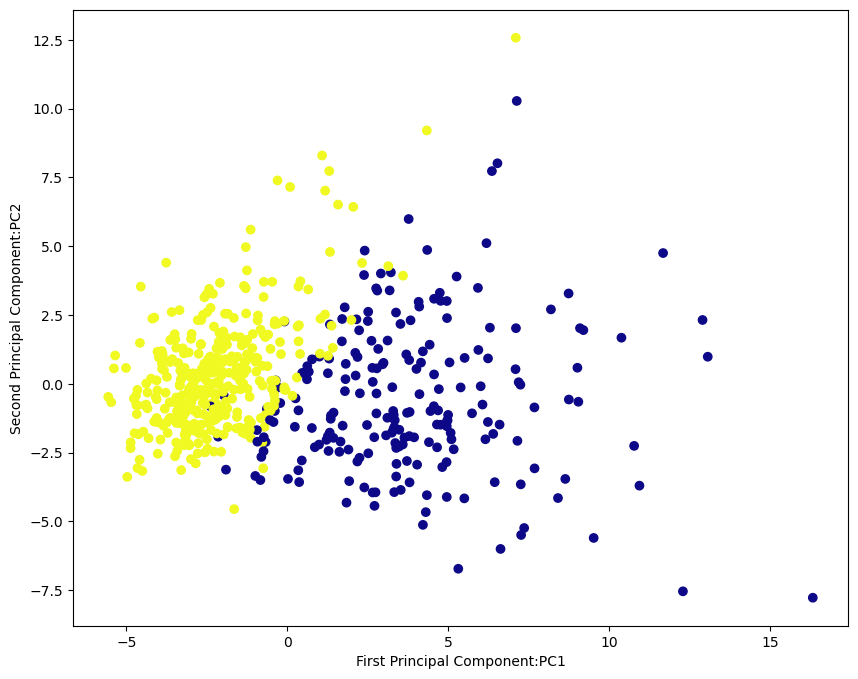

In [19]:
# Ploting the 2D fetures:

plt.figure(figsize=(10,8))
plt.scatter(df_pca[:,0], df_pca[:,1], c=cancer_df['target'],cmap='plasma')
plt.xlabel('First Principal Component:PC1')
plt.ylabel("Second Principal Component:PC2")


In [21]:
# We can apply 3D also: or 3 fetures(components) also can be apply

pca = PCA(n_components=3)

In [22]:
df_pca=pca.fit_transform(scaled_data)

In [27]:
df_pca

array([[ 9.1928368 ,  1.94858235, -1.12315443],
       [ 2.38780177, -3.76817249, -0.52928087],
       [ 5.73389628, -1.0751739 , -0.55174726],
       ...,
       [ 1.25617929, -1.90229645,  0.56272661],
       [10.37479407,  1.67201025, -1.87703153],
       [-5.47524335, -0.6706383 ,  1.49046543]])

In [24]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291015])

* as we applied 3 components it will give us 3 fetures from the all fetures.
* which only gives maximum variance from the data.
* after applying this PCA algorithm and getting best principal component line we are getting 3D where PC1 > PC2 > PC3